In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm
import random
import math
from sklearn.decomposition import PCA
tqdm.pandas(ascii=True)
%matplotlib inline



# PCA 2D

In [2]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style='white',
    palette='deep',
    font='sans-serif',
    font_scale=1.6,)


df = pd.read_excel('Book3.xlsx', sheet_name='Sheet1')
cols = df.columns[2:] 



c = df.Type.map({'A':'red', 'B':'blue', 'C':'green'})
#df.head(3)
cols



Index(['Her 2', 'Her2-GRB2-SHC', 'Her2-SHC', 'Her2-GRB2', 'ER',
       'ER-GATA3-FOXA1', 'ER-GATA3', 'ER-FOXA1', 'PR', 'PR-TIF2-SRC-1',
       'PR-TIF2', 'PR-SRC-1'],
      dtype='object')

In [3]:
cols = [ 'Her 2', 'Her2-GRB2-SHC', 'Her2-SHC', 'Her2-GRB2', 'ER',
       'ER-GATA3-FOXA1', 'ER-GATA3', 'ER-FOXA1', 'PR', 'PR-TIF2-SRC-1',
       'PR-TIF2', 'PR-SRC-1'
      ]

In [4]:
pca = PCA(n_components = 2)

In [5]:
xy = pca.fit_transform(df[cols])
xy = pd.DataFrame(xy, columns = ['PC1', 'PC2'])
df = df.join(xy)
df.head(3)

,Type,Unnamed: 1,Her 2,Her2-GRB2-SHC,Her2-SHC,Her2-GRB2,ER,ER-GATA3-FOXA1,ER-GATA3,ER-FOXA1,PR,PR-TIF2-SRC-1,PR-TIF2,PR-SRC-1,PC1,PC2
0,A,Patient 1,1.495,3.179,3.871,3.606,1.643,3.591,3.262,2.292,1.217,1.708,2.535,2.332,4.203026,0.718587
1,A,Patient 2,2.345,0.707,1.577,1.185,1.200,0.709,1.697,1.565,1.463,2.608,1.761,2.732,0.336941,-1.559029
2,A,Patient 3,1.498,1.411,1.531,1.343,1.287,0.047,1.621,0.626,1.469,1.223,1.518,1.513,-0.906169,0.012112


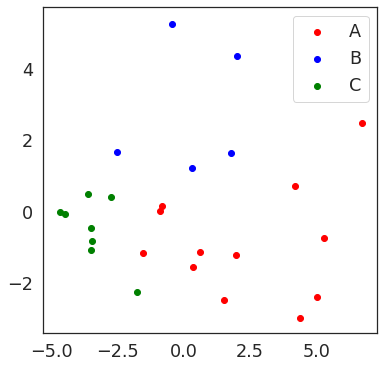

In [6]:

fig, ax = plt.subplots(figsize=(6,6))

#df.plot(x = 'PC1', y = 'PC2', kind = 'scatter', c = c, ax = ax, legend = True)

color_dict = {'A':'red', 'B':'blue', 'C':'green'}

for k,d in df.groupby('Type'):
    ax.scatter(d['PC1'], d['PC2'], label=k, c = color_dict.get(k))
plt.legend(loc=1, ncol  = 1)

plt.show()

In [7]:
df.to_excel('./PCA.xlsx')

In [8]:
pca.explained_variance_ratio_.round(3)

array([0.584, 0.213])

## 3D

In [3]:
import plotly.express as px



df = pd.read_excel('Book3.xlsx', sheet_name='Sheet1')
cols = df.columns[-3:] 

fig = px.scatter_3d(df, x=cols[0], y=cols[1], z=cols[2],
              color='Type')
fig.write_html('./3d.html')

# LDA

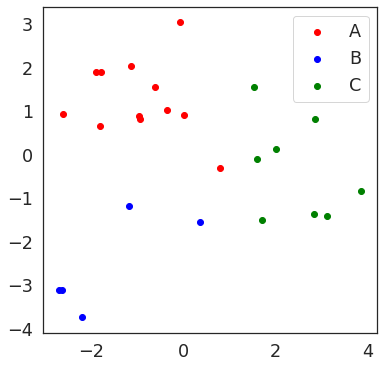

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #导入LDA算法


df = pd.read_excel('Book3.xlsx', sheet_name='Sheet1')
cols = df.columns[2:] 
X = df[cols]
y = df.Type

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
xy = lda.transform(X)
xy = pd.DataFrame(xy, columns = ['PC1', 'PC2'])
df = df.join(xy)
fig, ax = plt.subplots(figsize=(6,6))

#df.plot(x = 'PC1', y = 'PC2', kind = 'scatter', c = c, ax = ax, legend = True)

color_dict = {'A':'red', 'B':'blue', 'C':'green'}

for k,d in df.groupby('Type'):
    ax.scatter(d['PC1'], d['PC2'], label=k, c = color_dict.get(k))
plt.legend(loc=1, ncol  = 1)

plt.show()


In [11]:
lda.explained_variance_ratio_

array([0.57767723, 0.42232277])